# Проект e-commerce
Продакт-менеджер попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

- Сколько у нас пользователей, которые совершили покупку только один раз?
- Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
- По каждому товару определить, в какой день недели товар чаще всего покупается.
- Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
- Выполните когортный анализ пользователей.
- RFM-сегментация пользователей

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import scipy.stats as ss

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
# таблица с уникальными идентификаторами пользователей
customers = pd.read_csv('olist_customers_dataset.csv')  # чтение данных

customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
# таблица заказов
orders = pd.read_csv('olist_orders_dataset.csv')  # чтение данных

orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [4]:
# товарные позиции, входящие в заказы
items = pd.read_csv('olist_order_items_dataset.csv')  # чтение данных

items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### 0. Исследование данных

In [5]:
customers.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,a4f233c03b6fafdb264b06169a70deae,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [6]:
customers.isna().sum()  # количество NA's

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
customers.customer_id.nunique()  # количество уникальных customer_id

99441

In [9]:
customers.customer_unique_id.nunique()  # количество уникальных customer_unique_id

96096

Видно, что уникальных идентификаторов пользователя (аналог номера паспорта) customer_unique_id немного меньше, чем позаказных идентификаторов пользователя customer_id. Вероятно определенным customer_unique_id соответствуют > 1 customer_id. Возможно один и тот же пользователь делал заказы с компьютера / телефона / планшета и тд.

In [10]:
customers.groupby('customer_unique_id', as_index=False).agg({'customer_id': 'count'}) \
         .rename(columns={'customer_id': 'customer_id_number'}) \
         .query('customer_id_number > 1')

,customer_unique_id,customer_id_number
33,00172711b30d52eea8b313a7f2cced02,2
106,004288347e5e88a27ded2bb23747066c,2
124,004b45ec5c64187465168251cd1c9c2f,2
144,0058f300f57d7b93c477a131a59b36c3,2
249,00a39521eb40f7012db50455bf083460,2
...,...,...
95784,ff36be26206fffe1eb37afd54c70e18b,3
95810,ff44401d0d8f5b9c54a47374eb48c1b8,2
95916,ff8892f7c26aa0446da53d01b18df463,2
95934,ff922bdd6bafcdf99cb90d7f39cea5b3,3


In [11]:
customers[customers['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

# один и тот же customer_unique_id, но разные customer_id

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
13028,13362fc2728edd1397282bb32cf319c1,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP
26608,3483b2a9e678865616e7d1b69b28dd4c,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP


In [12]:
customers.query('customer_unique_id == "00172711b30d52eea8b313a7f2cced02"')

# один и тот же customer_unique_id, но разные customer_id

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


В другой таблице (orders) используется именно customer_id.

In [13]:
orders.describe(include='object')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,58b08002b3f04ddb29d32fea1465db0d,a4f233c03b6fafdb264b06169a70deae,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
orders.isna().sum()  # количество NA's

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [16]:
# конвертируем колонки со временем в datetime
orders["order_purchase_timestamp"] = pd.to_datetime(orders.order_purchase_timestamp)
orders["order_approved_at"] = pd.to_datetime(orders.order_approved_at)
orders["order_delivered_carrier_date"] = pd.to_datetime(orders.order_delivered_carrier_date)
orders["order_delivered_customer_date"] = pd.to_datetime(orders.order_delivered_customer_date)
orders["order_estimated_delivery_date"] = pd.to_datetime(orders.order_estimated_delivery_date)

orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [17]:
orders.order_status.nunique()  # количество уникальных order_status

8

In [18]:
orders.order_status.unique()  # уникальные order_status

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [19]:
orders.order_status.value_counts().reset_index()

,index,order_status
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [20]:
(orders.order_status.value_counts() / orders.order_status.value_counts().sum()).reset_index()

,index,order_status
0,delivered,0.970203
1,shipped,0.011132
2,canceled,0.006285
3,unavailable,0.006124
4,invoiced,0.003158
5,processing,0.003027
6,created,0.000050
7,approved,0.000020


In [21]:
orders.query('order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [22]:
orders.query('order_status == "canceled" & order_delivered_customer_date != "NaT"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


In [23]:
items.describe(include='object')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [24]:
items.isna().sum()  # количество NA's

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [26]:
items["shipping_limit_date"] = pd.to_datetime(items.shipping_limit_date)

items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [27]:
items.order_id.nunique()

98666

In [28]:
items.query('order_item_id > 1')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [29]:
items.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


Проверим через множества соответствие order_id из orders и order_id из items.

In [30]:
# с подтвержденной оплатой заказа

orders.query('order_approved_at != "NaT"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [31]:
# с подтвержденной оплатой заказа

orders[orders['order_approved_at'].notnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [32]:
orders_order_id_set = set(orders.order_id)
len(orders_order_id_set)

99441

In [33]:
items_order_id_set = set(items.order_id)
len(items_order_id_set)

98666

In [34]:
intersection_set_orders_and_items = orders_order_id_set & items_order_id_set
len(intersection_set_orders_and_items)

98666

Видно, что не все order_id включены в таблицу items. Значит делать merge таблиц orders и items с how='inner' по order_id не корректно, т.к. часть order_id потеряются. И значит, что для некоторых order_id не будет информации из таблицы items по seller_id, shipping_limit_date,	price, freight_value.

Проверим через множества соответствие customer_id из customers и customer_id из orders. 

In [35]:
orders_customer_id_set = set(orders.customer_id)
len(orders_customer_id_set)

99441

In [36]:
customers_customer_id_set = set(customers.customer_id)
len(customers_customer_id_set)

99441

In [37]:
intersection_set_customers_and_orders = customers_customer_id_set & orders_customer_id_set
len(intersection_set_customers_and_orders)

99441

Видно, что customer_id из customers и customer_id из orders cовпадают. Значит делать merge таблиц customers и orders с how='inner' по customer_id корректно.

#### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Как правильно определить покупку? Будет ли покупка считаться, когда товар доставлен или достаточно, чтобы было время подтверждение оплаты заказа (время подтверждение оплаты заказа order_approved_at не NaN)? Вероятно стоит считать покупкой ситуацию, когда есть подтверждение оплаты заказа (время подтверждение оплаты заказа order_approved_at не NaN). Cчитать пользователей совершивших покупку будем по customer_unique_id.

Получим датафрейм customers_and_orders, который будет содержать информацию о пользователях и заказах при помощи merge(). 

Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь да.

In [38]:
customers_and_orders = customers.merge(orders, how='inner', on='customer_id')
customers_and_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [39]:
customers_and_orders.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Отфильтруем только заказы с подтверждением оплаты (время подтверждение оплаты заказа order_approved_at не NaN).

In [40]:
customers_and_orders_paid = customers_and_orders.query('order_approved_at != "NaT"')
customers_and_orders_paid

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [41]:
# то же самое 

customers_and_orders.dropna(subset=['order_approved_at'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [42]:
customers_and_orders_paid.groupby('customer_unique_id', as_index=False) \
                         .agg({'order_id': 'count'}) \
                         .rename(columns={'order_id': 'order_id_number'}) \
                         .query('order_id_number == 1')

,customer_unique_id,order_id_number
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,1
95993,fffea47cd6d3cc0a88bd621562a9d061,1
95994,ffff371b4d645b6ecea244b27531430a,1
95995,ffff5962728ec6157033ef9805bacc48,1


In [43]:
customers_and_orders_paid.groupby('customer_unique_id', as_index=False) \
                         .agg({'order_id': 'count'}) \
                         .rename(columns={'order_id': 'order_id_number'}) \
                         .order_id_number.value_counts()

1     93049
2      2708
3       191
4        30
5         8
6         6
7         3
17        1
9         1
Name: order_id_number, dtype: int64

Выходит, что 93049 пользователей, которые совершили покупку только один раз.

#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Если после подтверждения оплаты заказа, покупатель отменяет покупку, то она дальше учитывается как отмененная cancelled (судя по order_status отмена может быть после того, как прошла оплата, после того, как товар отгружен со склада, т.е. передан в в логистическую службу, после того, как товар доставлен). Если после подтверждения оплаты заказа, order_status становиться unavailable, то вероятно после подтверждения оплаты заказа товара уже нет в наличии / его успели собрать и отгрузить кому-то другому. Остальные оrder_status в этом задании отражают внутренние процессы магазина. 

Месяц из order_purchase_timestamp.

Будем использовать датафрейм customers_and_orders.

In [44]:
orders_not_delivered = customers_and_orders.query('order_status != "delivered"')
orders_not_delivered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaT,2018-08-02
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaT,2018-05-23
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaT,2017-03-17
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaT,2018-03-01


In [45]:
orders_not_delivered.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [46]:
orders_not_delivered.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status
count,2963,2963,2963,2963,2963,2963
unique,2963,2937,728,27,2963,7
top,b0578f6e3f6019e803f13ef0ba346530,ff36be26206fffe1eb37afd54c70e18b,sao paulo,SP,10a154c430a23bb8a3ecb2ffc52bf81e,shipped
freq,1,3,495,1245,1,1107


In [47]:
print('Orders_not_delivered time range from {} to {}'.format(orders_not_delivered['order_purchase_timestamp'].min(),
                                           orders_not_delivered['order_purchase_timestamp'].max()))

Orders_not_delivered time range from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


Имеет смысл создать новую колонку с годом и месяцем заказа order_purchase_timestamp_year_month

In [48]:
orders_not_delivered['order_purchase_timestamp_year_month'] = orders_not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m')
orders_not_delivered

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year_month
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,2018-03
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,2018-04
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20,2018-01
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09,2018-01
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaT,2018-08-02,2018-07
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaT,2018-05-23,2018-04
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaT,2017-03-17,2017-02
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaT,2018-03-01,2018-01


In [49]:
orders_not_delivered.groupby(['order_purchase_timestamp_year_month', 'order_status'], as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .rename(columns={'order_id': 'order_id_number'})

,order_purchase_timestamp_year_month,order_status,order_id_number
0,2016-09,canceled,2
1,2016-09,shipped,1
2,2016-10,canceled,24
3,2016-10,invoiced,18
4,2016-10,processing,2
...,...,...,...
108,2018-08,shipped,47
109,2018-08,unavailable,7
110,2018-09,canceled,15
111,2018-09,shipped,1


Теперь в месяц в среднем:

In [50]:
orders_not_delivered.groupby(['order_purchase_timestamp_year_month', 'order_status'], as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .rename(columns={'order_id': 'order_id_number'}) \
                    .groupby('order_status', as_index=False) \
                    .agg({'order_id_number': 'mean'}) \
                    .rename(columns={'order_id_number': 'orders_id_number_mean_per_month'}).round(2)

,order_status,orders_id_number_mean_per_month
0,approved,1.00
1,canceled,26.04
2,created,1.67
3,invoiced,14.95
4,processing,15.84
5,shipped,48.13
6,unavailable,29.00


Единственный нюанс это то, что заказы (которые в итоге не доставили) фиксировались с 2016-09-04 21:15:19 по 2018-10-17 17:30:18, получается 2016-09 и 2018-10 месяцы включены не полностью, попробуем посчитать среднее количество не доставленных заказов по разным причинам в период с 2016-10 до 2018-09, чтобы месяцы были полностью включены в анализ:

In [51]:
orders_not_delivered.query('order_purchase_timestamp_year_month not in ["2016-09", "2018-10"]') \
                    .groupby(['order_purchase_timestamp_year_month', 'order_status'], as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .rename(columns={'order_id': 'order_id_number'}) \
                    .groupby('order_status', as_index=False) \
                    .agg({'order_id_number': 'mean'}) \
                    .rename(columns={'order_id_number': 'orders_id_number_mean_per_month'}).round(2)

,order_status,orders_id_number_mean_per_month
0,approved,1.00
1,canceled,28.14
2,created,1.67
3,invoiced,14.95
4,processing,15.84
5,shipped,50.27
6,unavailable,29.00


#### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Получим датафрейм orders_and_items, который будет содержать информацию о заказах и товарах при помощи merge().


Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь нет (описано в конце пункта 0. Исследование данных), поэтому здесь корректно использовать merge() c how='left'.

In [52]:
orders_and_items = orders.merge(items, how='left', on='order_id')
orders_and_items

# больше строк из-за декартового произведения, одинаковые order_id с разными описаниями из items соответствующие одному order_id из orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [53]:
orders_and_items.describe(include='object')

,order_id,customer_id,order_status,product_id,seller_id
count,113425,113425,113425,112650,112650
unique,99441,99441,8,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,21,110197,527,2033


In [54]:
orders_and_items.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

Добавим колонку weekday - день недели в который товар чаще всего покупается.

In [55]:
orders_and_items['weekday'] = orders_and_items.order_purchase_timestamp.dt.strftime('%A')
orders_and_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [56]:
orders_and_items.dropna(subset=['order_approved_at']) \
                .groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'freight_value': 'count'}) \
                .rename(columns={'freight_value': 'product_id_number_purchased'}) 

# dropna(subset=['order_approved_at']) чтобы остались только оплаченные покупки

,product_id,weekday,product_id_number_purchased
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
61216,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
61217,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
61218,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
61219,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Теперь оставим только 1 день, когда совершалось самое большое число покупок определенного товара. Если допустим в пятницу и воскресение купили по 75 единиц товара, а в остальные дни меньше, то останется либо пятница, либо воскресение после drop_duplicates().

In [57]:
orders_and_items.dropna(subset=['order_approved_at']) \
                .groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'freight_value': 'count'}) \
                .rename(columns={'freight_value': 'product_id_number_purchased'}) \
                .sort_values('product_id_number_purchased', ascending=False) \


,product_id,weekday,product_id_number_purchased
15899,422879e10f46682990de24d770e7f83d,Wednesday,93
36507,99a4788cb24856965c36a24e339b6058,Monday,92
41039,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41035,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41040,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
...,...,...,...
24016,642e125cbc752b4eeb8faf442319c39f,Thursday,1
24019,64315bd8c0c47303179dd2e25b579d00,Saturday,1
24024,6432d844f2be41bb6f2fd279e23415da,Friday,1
24026,6435535083cf42eb1ce5d96f2c4d3482,Tuesday,1


In [58]:
orders_and_items.dropna(subset=['order_approved_at']) \
                .groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'freight_value': 'count'}) \
                .rename(columns={'freight_value': 'product_id_number_purchased'}) \
                .sort_values('product_id_number_purchased', ascending=False) \
                .drop_duplicates(subset=['product_id'], keep='first')

,product_id,weekday,product_id_number_purchased
15899,422879e10f46682990de24d770e7f83d,Wednesday,93
36507,99a4788cb24856965c36a24e339b6058,Monday,92
41039,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20123,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13534,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
24004,642247ccf62585635cefa1bf09f59b94,Sunday,1
24016,642e125cbc752b4eeb8faf442319c39f,Thursday,1
24024,6432d844f2be41bb6f2fd279e23415da,Friday,1
24026,6435535083cf42eb1ce5d96f2c4d3482,Tuesday,1


In [59]:
orders_and_items.dropna(subset=['order_approved_at']) \
                .groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'freight_value': 'count'}) \
                .rename(columns={'freight_value': 'product_id_number_purchased'}) \
                .sort_values('product_id_number_purchased', ascending=False) \
                .drop_duplicates(subset=['product_id'], keep='first') \
                [['product_id', 'weekday']]

,product_id,weekday
15899,422879e10f46682990de24d770e7f83d,Wednesday
36507,99a4788cb24856965c36a24e339b6058,Monday
41039,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
20123,53b36df67ebb7c41585e8d54d6772e08,Tuesday
13534,389d119b48cf3043d311335e499d9c6b,Thursday
...,...,...
24004,642247ccf62585635cefa1bf09f59b94,Sunday
24016,642e125cbc752b4eeb8faf442319c39f,Thursday
24024,6432d844f2be41bb6f2fd279e23415da,Friday
24026,6435535083cf42eb1ce5d96f2c4d3482,Tuesday


In [60]:
orders_and_items.dropna(subset=['order_approved_at']) \
                .groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'freight_value': 'count'}) \
                .rename(columns={'freight_value': 'product_id_number_purchased'}) \
                .sort_values('product_id_number_purchased', ascending=False) \
                .drop_duplicates(subset=['product_id'], keep='first') \
                [['product_id', 'weekday']]

,product_id,weekday
15899,422879e10f46682990de24d770e7f83d,Wednesday
36507,99a4788cb24856965c36a24e339b6058,Monday
41039,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
20123,53b36df67ebb7c41585e8d54d6772e08,Tuesday
13534,389d119b48cf3043d311335e499d9c6b,Thursday
...,...,...
24004,642247ccf62585635cefa1bf09f59b94,Sunday
24016,642e125cbc752b4eeb8faf442319c39f,Thursday
24024,6432d844f2be41bb6f2fd279e23415da,Friday
24026,6435535083cf42eb1ce5d96f2c4d3482,Tuesday


#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Получим датафрейм customers_and_orders, который будет содержать информацию о пользователях и заказах при помощи merge(). 

Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь да.

In [61]:
customers_and_orders = customers.merge(orders, how='inner', on='customer_id')
customers_and_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


Отфильтруем только заказы с подтверждением оплаты (время подтверждение оплаты заказа order_approved_at не NaN).

In [62]:
customers_and_orders_paid = customers_and_orders.dropna(subset=['order_approved_at'])
customers_and_orders_paid

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [63]:
print('Orders_paid time range from {} to {}'.format(customers_and_orders_paid['order_purchase_timestamp'].min(),
                                           customers_and_orders_paid['order_purchase_timestamp'].max()))

Orders_paid time range from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


Имеет смысл создать новую колонку с годом и месяцем оплаченного заказа order_purchase_timestamp_year_month.

In [64]:
customers_and_orders_paid['order_purchase_timestamp_year_month'] = customers_and_orders_paid.order_purchase_timestamp.dt.strftime('%Y-%m')
customers_and_orders_paid

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11


Создаем колонку с количеством недель в каждом месяце.

In [65]:
customers_and_orders_paid['weeks_in_mounth'] = customers_and_orders_paid.order_purchase_timestamp.dt.days_in_month/7
customers_and_orders_paid

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year_month,weeks_in_mounth
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,4.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,4.285714
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,4.285714
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,4.285714
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,4.285714


Производим группировку по покупателю customer_unique_id, месяцу покупки order_purchase_timestamp_year_month, считаем соответствующее количество заказов в этот месяц и делим на количество недель в этом месяце. 

In [66]:
purchases_per_customer_per_week = customers_and_orders_paid \
                         .groupby(['customer_unique_id', 'order_purchase_timestamp_year_month', 'weeks_in_mounth'], as_index=False) \
                         .agg({'order_id': 'count'}) \
                         .rename(columns={'order_id': 'order_id_number'})

purchases_per_customer_per_week

,customer_unique_id,order_purchase_timestamp_year_month,weeks_in_mounth,order_id_number
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1
...,...,...,...,...
97911,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1
97912,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1
97913,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1
97914,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1


In [67]:
purchases_per_customer_per_week['avg_purchase_in_week'] = purchases_per_customer_per_week.order_id_number / purchases_per_customer_per_week.weeks_in_mounth
purchases_per_customer_per_week

,customer_unique_id,order_purchase_timestamp_year_month,weeks_in_mounth,order_id_number,avg_purchase_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333
...,...,...,...,...,...
97911,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1,0.233333
97912,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1,0.225806
97913,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1,0.250000
97914,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1,0.225806


Единственный нюанс это то, что оплаченные заказы фиксировались с 2016-09-04 21:15:19 по 2018-09-03 09:06:57, получается 2016-09 и 2018-09 месяцы включены не полностью, попробуем посчитать среднее количество не доставленных заказов по разным причинам в период с 2016-10 до 2018-08, чтобы месяцы были полностью включены в анализ:

In [68]:
purchases_per_customer_per_week = customers_and_orders_paid \
                         .query('order_purchase_timestamp_year_month not in ["2016-09", "2018-09"]') \
                         .groupby(['customer_unique_id', 'order_purchase_timestamp_year_month', 'weeks_in_mounth'], as_index=False) \
                         .agg({'order_id': 'count'}) \
                         .rename(columns={'order_id': 'order_id_number'})

purchases_per_customer_per_week

,customer_unique_id,order_purchase_timestamp_year_month,weeks_in_mounth,order_id_number
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1
...,...,...,...,...
97906,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1
97907,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1
97908,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1
97909,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1


In [69]:
purchases_per_customer_per_week['avg_purchase_in_week'] = purchases_per_customer_per_week.order_id_number / purchases_per_customer_per_week.weeks_in_mounth
purchases_per_customer_per_week

,customer_unique_id,order_purchase_timestamp_year_month,weeks_in_mounth,order_id_number,avg_purchase_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333
...,...,...,...,...,...
97906,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1,0.233333
97907,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1,0.225806
97908,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1,0.250000
97909,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1,0.225806


#### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Метрика Retention означает «удержание пользователей». Чтобы рассчитать Retention, вам нужно знать динамику количества активных пользователей определенной когорты по месяцам.

Получим датафрейм customers_and_orders, который будет содержать информацию о пользователях и заказах при помощи merge(). 

Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь да.

In [70]:
customers_and_orders = customers.merge(orders, how='inner', on='customer_id')
customers_and_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


Отфильтруем только заказы с подтверждением оплаты (время подтверждение оплаты заказа order_approved_at не NaN).

In [71]:
customers_and_orders_paid = customers_and_orders.dropna(subset=['order_approved_at'])
customers_and_orders_paid

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [72]:
print('Orders_paid time range from {} to {}'.format(customers_and_orders_paid['order_purchase_timestamp'].min(),
                                           customers_and_orders_paid['order_purchase_timestamp'].max()))

Orders_paid time range from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


Имеет смысл создать новую колонку с годом и месяцем оплаченного заказа order_purchase_timestamp_year_month.

In [73]:
customers_and_orders_paid['order_purchase_timestamp_year_month'] = customers_and_orders_paid.order_purchase_timestamp.dt.strftime('%Y-%m')
customers_and_orders_paid

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11


Проверим период, за который были предоставлены данные:

<a list of 24 Text major ticklabel objects>

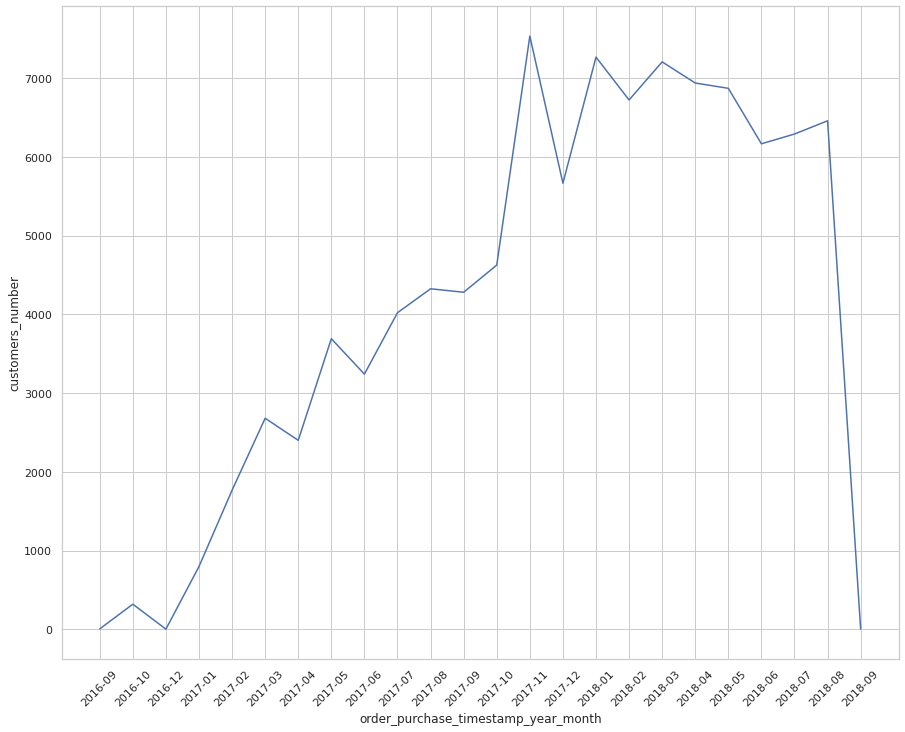

In [74]:
time = customers_and_orders_paid.groupby('order_purchase_timestamp_year_month',as_index=False) \
                                .agg({'customer_unique_id':'count'}) \
                                .rename(columns={'customer_unique_id': 'customers_number'})

line,ax = plt.subplots(figsize=(15,12))
sns.lineplot(data=time, x='order_purchase_timestamp_year_month', y='customers_number')
plt.xticks(rotation=45)[1]

Полностью под анализ попадает 2017 год (с января по декабрь).

Создадим столбец с месяцем первого заказа 'order_purchase_timestamp_first'.

In [75]:
customers_and_orders_paid_for_merge = customers_and_orders_paid \
                                      .groupby('customer_unique_id',as_index=False) \
                                      .agg({'order_purchase_timestamp_year_month':'min'}) \
                                      .rename(columns={'order_purchase_timestamp_year_month': 'order_purchase_timestamp_year_month_first'})

customers_and_orders_paid_for_merge


# Размер у этой таблице меньше, теперь сделаем merge() c how='inner' c основной таблицей,
# таким образом добавим колонку order_purchase_timestamp_year_month_first в нашу основую таблицу customers_and_orders_paid.

,customer_unique_id,order_purchase_timestamp_year_month_first
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
95993,fffea47cd6d3cc0a88bd621562a9d061,2017-12
95994,ffff371b4d645b6ecea244b27531430a,2017-02
95995,ffff5962728ec6157033ef9805bacc48,2018-05


In [76]:
customers_and_orders_paid = customers_and_orders_paid.merge(customers_and_orders_paid_for_merge, how='inner', on='customer_unique_id', right_index=True)
                                                    
customers_and_orders_paid

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year_month,order_purchase_timestamp_year_month_first
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017-11


In [77]:
'''

# косметические изменения в названиях колонок

customers_and_orders_paid = customers_and_orders_paid.drop(columns=['order_purchase_timestamp_year_month_first_y']) \
                                                     .rename(columns={'order_purchase_timestamp_year_month_first_x': 'order_purchase_timestamp_year_month_first'})

customers_and_orders_paid

'''

"\n\n# косметические изменения в названиях колонок\n\ncustomers_and_orders_paid = customers_and_orders_paid.drop(columns=['order_purchase_timestamp_year_month_first_y'])                                                      .rename(columns={'order_purchase_timestamp_year_month_first_x': 'order_purchase_timestamp_year_month_first'})\n\ncustomers_and_orders_paid\n\n"

Оставим только нужные для расчета колонки.

In [78]:
customers_and_orders_paid = customers_and_orders_paid[['customer_unique_id', 'order_purchase_timestamp_year_month', 'order_purchase_timestamp_year_month_first']]
customers_and_orders_paid

,customer_unique_id,order_purchase_timestamp_year_month,order_purchase_timestamp_year_month_first
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07,2018-07
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04,2018-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11


In [79]:
customers_first_month_for_merge = customers_and_orders_paid.groupby('order_purchase_timestamp_year_month_first', as_index=False) \
                                  .agg({'customer_unique_id': pd.Series.nunique})  \
                                  .rename(columns={'customer_unique_id':'custumers_first_month_number'})

customers_first_month_for_merge

,order_purchase_timestamp_year_month_first,custumers_first_month_number
0,2016-09,4
1,2016-10,315
2,2016-12,1
3,2017-01,762
4,2017-02,1738
5,2017-03,2634
6,2017-04,2348
7,2017-05,3590
8,2017-06,3138
9,2017-07,3889


Добавим нужную колонку custumers_first_month_number в основную таблицу.

In [80]:
customers_and_orders_paid = customers_and_orders_paid.merge(customers_first_month_for_merge, how='inner', on='order_purchase_timestamp_year_month_first')
customers_and_orders_paid

,customer_unique_id,order_purchase_timestamp_year_month,order_purchase_timestamp_year_month_first,custumers_first_month_number
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,3590
1,7f3a72e8f988c6e735ba118d54f47458,2017-05,2017-05,3590
2,2e6a42a9b5cbb0da62988694f18ee295,2017-05,2017-05,3590
3,fd2d5fdb84e65fa6b54b98b0e2df5645,2017-05,2017-05,3590
4,8728c766c84eeda24b3e54fe6e632051,2017-05,2017-05,3590
...,...,...,...,...
99276,f7b981e8a280e455ac3cbe0d5d171bd1,2016-12,2016-12,1
99277,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09,4
99278,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09,4
99279,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09,4


Создадим колонку с количеством пользователей из одной когорты, совершивших покупки в месяц order_purchase_timestamp_year_month (возвратившиеся пользователи) и колонку с количеством пользователей из одной когорты, совершивших покупки в первый месяц order_purchase_timestamp_year_month_first.

Оставим покупки, сделанные в 2017 году.

In [81]:
cohorts = customers_and_orders_paid.groupby(['order_purchase_timestamp_year_month_first', 'order_purchase_timestamp_year_month'], as_index=False) \
                .agg({'customer_unique_id':pd.Series.nunique, 'custumers_first_month_number':'max'})  \
                .rename(columns={'customer_unique_id': 'number_of_cohorts_users'})


cohorts = cohorts.query('"2017-01" <= order_purchase_timestamp_year_month_first <= "2017-12"')
cohorts

,order_purchase_timestamp_year_month_first,order_purchase_timestamp_year_month,number_of_cohorts_users,custumers_first_month_number
12,2017-01,2017-01,762,762
13,2017-01,2017-02,3,762
14,2017-01,2017-03,2,762
15,2017-01,2017-04,1,762
16,2017-01,2017-05,3,762
...,...,...,...,...
178,2017-12,2018-04,15,5482
179,2017-12,2018-05,11,5482
180,2017-12,2018-06,9,5482
181,2017-12,2018-07,2,5482


Cоздадим колонку retention_rate_% (в процентах) - процент возвратившихся за покупками в другой месяц пользователей.

In [82]:
cohorts['retention_rate_%'] = ((cohorts.number_of_cohorts_users / cohorts.custumers_first_month_number) * 100).round(2)
cohorts

,order_purchase_timestamp_year_month_first,order_purchase_timestamp_year_month,number_of_cohorts_users,custumers_first_month_number,retention_rate_%
12,2017-01,2017-01,762,762,100.00
13,2017-01,2017-02,3,762,0.39
14,2017-01,2017-03,2,762,0.26
15,2017-01,2017-04,1,762,0.13
16,2017-01,2017-05,3,762,0.39
...,...,...,...,...,...
178,2017-12,2018-04,15,5482,0.27
179,2017-12,2018-05,11,5482,0.20
180,2017-12,2018-06,9,5482,0.16
181,2017-12,2018-07,2,5482,0.04


Добавим порядковое значение периода когорты (месяца, когда мы ждем повторной покупки) для каждой когорты.

In [83]:
def cohort_period(date):
    period = 0
    year_month = date.split('-')
    if year_month[0] == "2017":
        period = int(year_month[1])
    else:
        period = int(year_month[1]) + 12
    return period

cohorts['cohort_period'] = cohorts.order_purchase_timestamp_year_month.apply(cohort_period)
cohorts

,order_purchase_timestamp_year_month_first,order_purchase_timestamp_year_month,number_of_cohorts_users,custumers_first_month_number,retention_rate_%,cohort_period
12,2017-01,2017-01,762,762,100.00,1
13,2017-01,2017-02,3,762,0.39,2
14,2017-01,2017-03,2,762,0.26,3
15,2017-01,2017-04,1,762,0.13,4
16,2017-01,2017-05,3,762,0.39,5
...,...,...,...,...,...,...
178,2017-12,2018-04,15,5482,0.27,16
179,2017-12,2018-05,11,5482,0.20,17
180,2017-12,2018-06,9,5482,0.16,18
181,2017-12,2018-07,2,5482,0.04,19


Bернем обратно индексы, но теперь с когортами и периодами когорт:

In [84]:
cohorts.set_index(['order_purchase_timestamp_year_month_first', 'cohort_period'], inplace=True)
cohorts

order_purchase_timestamp_year_month  \
order_purchase_timestamp_year_month_first cohort_period                                       
2017-01                                   1                                         2017-01   
                                          2                                         2017-02   
                                          3                                         2017-03   
                                          4                                         2017-04   
                                          5                                         2017-05   
...                                                                                     ...   
2017-12                                   16                                        2018-04   
                                          17                                        2018-05   
                                          18                                        2018-06   
                                          19                                        2018-07   
                                          20                                        2018-08   

                                                         number_of_cohorts_users  \
order_purchase_timestamp_year_month_first cohort_period                            
2017-01                                   1                                  762   
                                          2                                    3   
                                          3                                    2   
                                          4                                    1   
                                          5                                    3   
...                                                                          ...   
2017-12                                   16                                  15   
                                          17                                  11   
                                          18                                   9   
                                          19                                   2   
                                          20                                  12   

                                                         custumers_first_month_number  \
order_purchase_timestamp_year_month_first cohort_period                                 
2017-01                                   1                                       762   
                                          2                                       762   
                                          3                                       762   
                                          4                                       762   
                                          5                                       762   
...                                                                               ...   
2017-12                                   16                                     5482   
                                          17                                     5482   
                                          18                                     5482   
                                          19                                     5482   
                                          20                                     5482   

                                                         retention_rate_%  
order_purchase_timestamp_year_month_first cohort_period                    
2017-01                                   1                        100.00  
                                          2                          0.39  
                                          3                          0.26  
                                          4                          0.13  
                                          5                          0.39  
...                                  

In [85]:
cohorts['retention_rate_%']

order_purchase_timestamp_year_month_first  cohort_period
2017-01                                    1                100.00
                                           2                  0.39
                                           3                  0.26
                                           4                  0.13
                                           5                  0.39
                                                             ...  
2017-12                                    16                 0.27
                                           17                 0.20
                                           18                 0.16
                                           19                 0.04
                                           20                 0.22
Name: retention_rate_%, Length: 171, dtype: float64

In [86]:
table_retention_rate = cohorts['retention_rate_%'].unstack(level='cohort_period')
table_retention_rate

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
order_purchase_timestamp_year_month_first,,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13,0.79,0.39,0.13,0.13,0.26,0.39,NaN,0.13
2017-02,NaN,100.00,0.23,0.29,0.12,0.40,0.12,0.23,0.17,0.12,0.23,0.12,0.29,0.17,0.17,0.12,0.06,0.06,0.23,NaN
2017-03,NaN,NaN,100.00,0.49,0.34,0.38,0.34,0.15,0.15,0.30,0.34,0.08,0.38,0.15,0.23,0.11,0.15,0.23,0.08,0.15
2017-04,NaN,NaN,NaN,100.00,0.60,0.21,0.17,0.34,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.21
2017-05,NaN,NaN,NaN,NaN,100.00,0.47,0.50,0.39,0.31,0.33,0.42,0.17,0.25,0.31,0.25,0.33,0.25,0.03,0.19,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.35,0.41,0.25,0.38,0.38,0.22,0.13,0.22,0.32,0.35,0.16,0.13,0.19
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.51,0.36,0.26,0.28,0.21,0.31,0.10,0.18,0.26,0.23,0.31,0.13,0.26
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.33,0.26,0.36,0.53,0.29,0.26,0.14,0.14,0.24,0.19,0.10
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.68,0.53,0.29,0.46,0.22,0.22,0.24,0.29,0.17,0.27,0.07


Визуализируем полученные данные при помощи тепловой карты:

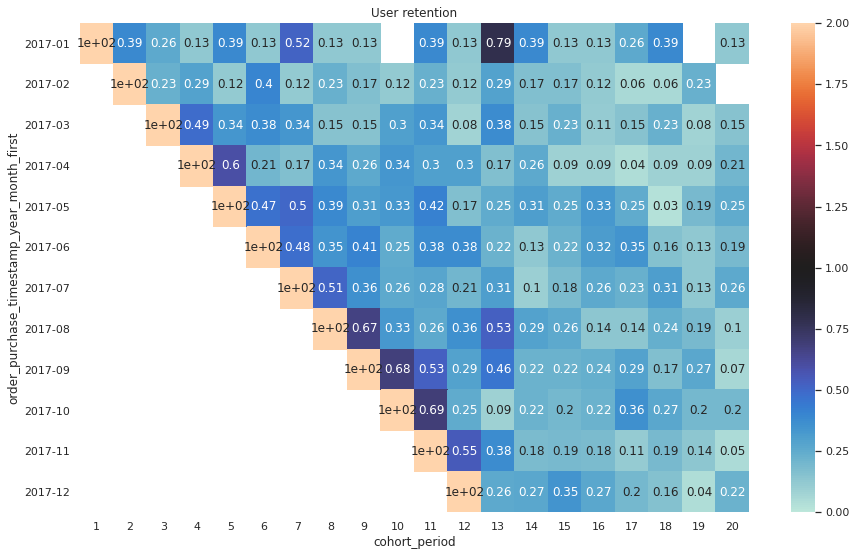

In [88]:
plt.figure(figsize=(15, 9))
plt.xlabel('Cohorts')
plt.title('User retention')
sns.heatmap(table_retention_rate, annot=True, vmin=0, vmax=2, center=1)

Видно по таблице, что максимальный retention_rate на 3-й месяц равен 0.41 (когорта 2017-06).
Можно посмотреть и по-другому:

In [96]:
max_retantion_rate = cohorts.copy()
max_retantion_rate.reset_index(inplace=True)
max_retantion_rate

,order_purchase_timestamp_year_month_first,cohort_period,order_purchase_timestamp_year_month,number_of_cohorts_users,custumers_first_month_number,retention_rate_%
0,2017-01,1,2017-01,762,762,100.00
1,2017-01,2,2017-02,3,762,0.39
2,2017-01,3,2017-03,2,762,0.26
3,2017-01,4,2017-04,1,762,0.13
4,2017-01,5,2017-05,3,762,0.39
...,...,...,...,...,...,...
166,2017-12,16,2018-04,15,5482,0.27
167,2017-12,17,2018-05,11,5482,0.20
168,2017-12,18,2018-06,9,5482,0.16
169,2017-12,19,2018-07,2,5482,0.04


In [97]:
for index, row in max_retantion_rate[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row))

Индекс: 0,
Содержимое строки:
order_purchase_timestamp_year_month_first    2017-01
cohort_period                                      1
order_purchase_timestamp_year_month          2017-01
number_of_cohorts_users                          762
custumers_first_month_number                     762
retention_rate_%                                 100
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
order_purchase_timestamp_year_month_first    2017-01
cohort_period                                      2
order_purchase_timestamp_year_month          2017-02
number_of_cohorts_users                            3
custumers_first_month_number                     762
retention_rate_%                                0.39
Name: 1, dtype: object



In [98]:
list_1, list_2 = [], []

for index, row in max_retantion_rate.iterrows():
    month_number = int(row['order_purchase_timestamp_year_month_first'].split('-')[1])
    if row['cohort_period'] == (month_number + 3):
        list_1.append(row['order_purchase_timestamp_year_month_first'])
        list_2.append(row['retention_rate_%'])

In [102]:
data_frame = pd.DataFrame({'month_number': list_1, 'retention_rate_%_3rd_month': list_2})
data_frame

,month_number,retention_rate_%_3rd_month
0,2017-01,0.13
1,2017-02,0.12
2,2017-03,0.38
3,2017-04,0.17
4,2017-05,0.39
5,2017-06,0.41
6,2017-07,0.26
7,2017-08,0.26
8,2017-09,0.29
9,2017-10,0.09


In [103]:
data_frame.loc[data_frame['retention_rate_%_3rd_month'].idxmax()]

month_number                  2017-06
retention_rate_%_3rd_month       0.41
Name: 5, dtype: object

#### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Recency: How recent is the last purchase of the customer (время от последней покупки пользователя до текущей даты).

Frequency: How often the customer makes a purchase (суммарное количество покупок у пользователя за исследуемое время - обычно за 1 год).

Monetary: How much money does the customer spends (сумма покупок за исследуемое время).

The advantages of RFM is that it is easy to implement and it can be used for different types of business. It helps craft better marketing campaigns and improves CRM and customer's loyalty.

The disadvantages are that it may not apply in industries where customers are usually one time buyers. It is based on historical data and won't give much insight about prospects.

Сначала получим датафрейм, который будет содержать информацию о пользователях и заказах при помощи merge(). 

Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь да.

Затем получим датафрейм customers_and_orders_and_items, который будет содержать информацию о пользователях, заказах и товарах при помощи merge().

Выше с помощью множеств определяли корректно ли делать merge() c how='inner', здесь нет (описано в конце пункта 0. Исследование данных), поэтому здесь корректно использовать merge() c how='left'.

Отфильтруем только заказы с подтверждением оплаты (время подтверждение оплаты заказа order_approved_at не NaN).

In [150]:
customers_and_orders_and_items = customers.merge(orders, how='inner', on='customer_id') \
                                          .merge(items, how='left', on='order_id') \
                                          .dropna(subset=['order_approved_at'])                                         

customers_and_orders_and_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [151]:
customers_and_orders_and_items.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1822
order_delivered_customer_date    3083
order_estimated_delivery_date       0
order_item_id                     629
product_id                        629
seller_id                         629
shipping_limit_date               629
price                             629
freight_value                     629
dtype: int64

In [152]:
customers_and_orders_and_items.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

In [153]:
customers_and_orders_and_items.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,product_id,seller_id
count,113264,113264,113264,113264,113264,113264,112635,112635
unique,99281,95997,4119,27,99281,7,32948,3095
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,24,17917,47741,21,110182,527,2033


What is the time frame of the data?

In [154]:
print('Orders from {} to {}'.format(customers_and_orders_and_items['order_purchase_timestamp'].min(),
                                    customers_and_orders_and_items['order_purchase_timestamp'].max()))

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


У нас есть данные о продажах примерно за два года (с сентября 2016 г. по сентябрь 2018 г.). 

Обычно для RFM-анализа используется один год. Но 2 года тоже можно использовать, в нашем анализе используем данные за 2 года.

I am going to simulate an analysis I am doing in real time by setting the NOW date at one day after the last purchase. This date will be used as a reference to calculate the Recency score.

In [155]:
NOW = customers_and_orders_and_items['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [156]:
period = (customers_and_orders_and_items['order_purchase_timestamp'].max() - customers_and_orders_and_items['order_purchase_timestamp'].min()).days
period

# примерно 2 года - 728 дней

728

В датасете каждая единица товара записывается в новую строку, даже если это допустим 3-й одинаковый товар order_item_id=3, купленный одним пользователем customer_unique_id. Price соответсвенно стоит за 1 единицу товара. Видимо в одном заказе может быть только один или несколько одинаковых товаров. Другой товар для этого же пользователя записывается в другой order_id. Будем считать покупкой покупку одного или нескольких одинаковых товаров одним пользователем customer_unique_id.

In [157]:
customers_and_orders_and_items.groupby(['customer_unique_id', 'order_id', 'product_id'], as_index=False) \
                              .agg({'freight_value': pd.Series.nunique}) \
                              .rename(columns={'freight_value': 'freight_value_unique'}) \
                              .query('freight_value_unique > 1')

# проверка утверждения выше

,customer_unique_id,order_id,product_id,freight_value_unique


In [158]:
purchases = customers_and_orders_and_items.groupby(['customer_unique_id', 'order_id', 'product_id', 'order_purchase_timestamp'], as_index=False) \
                                          .agg({'price': 'sum'}) \
                                          .rename(columns={'price': 'total_price_for_one_order'})

purchases

# .agg({'Price': lambda x: x.sum()}).reset_index()

,customer_unique_id,order_id,product_id,order_purchase_timestamp,total_price_for_one_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,372645c7439f9661fbbacfd129aa92ec,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,5099f7000472b634fea8304448d20825,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,64b488de448a5324c4134ea39c28a34b,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2345a354a6f2033609bbf62bf5be9ef6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,c72e18b3fe2739b8d24ebf3102450f37,2017-11-14 19:45:42,180.00
...,...,...,...,...,...
102406,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,c100e5fef1abb5e1c5054d1dac2d83ac,2017-06-08 21:00:36,890.00
102407,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,251876e7ba013b87b7262fb2524e2d60,2017-12-10 20:07:56,64.89
102408,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,13ad6994bda56edfa0a269e3d9a9acb3,2017-02-07 15:49:16,89.90
102409,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,461f43be3bdf8844e65b62d9ac2c7a5a,2018-05-02 15:17:41,115.00


In [159]:
purchases['customer_unique_id'].value_counts()

# Какой-то пользователь сделал 16 заказов за 2 года, какой-то 13 заказов за 2 года, какие-то сделали по 1 заказу за 2 года

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c    13
1b6c7548a2a1f9037c1fd3ddfed95f33     9
ca77025e7201e3b30c44b472ff346268     9
6469f99c1f9dfae7733b25662e7f1782     8
                                    ..
3d685f44a510ff2a42d9c8daefe9610c     1
3094d5cf2c1847c0254efd9931e407d9     1
b7177e06eec7855fd00999a6f5d6d349     1
5417a0b793fa4800a68b4525e6dcba27     1
d2bc70d1599ec65425dc9558d72b4986     1
Name: customer_unique_id, Length: 95407, dtype: int64

##### Calculate the Recency, Frequency and Monetary Value of each customers

To make things easier, I am going to add a column with the number of days between the purchase and now. To find the Recency values, I will just have to find the minimum of this column for each customer.

In [160]:
purchases['Days_Since_Order'] = purchases['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

purchases

,customer_unique_id,order_id,product_id,order_purchase_timestamp,total_price_for_one_order,Days_Since_Order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,372645c7439f9661fbbacfd129aa92ec,2018-05-10 10:56:27,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,5099f7000472b634fea8304448d20825,2018-05-07 11:11:27,18.90,119
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,64b488de448a5324c4134ea39c28a34b,2017-03-10 21:05:03,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2345a354a6f2033609bbf62bf5be9ef6,2017-10-12 20:29:41,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,c72e18b3fe2739b8d24ebf3102450f37,2017-11-14 19:45:42,180.00,293
...,...,...,...,...,...,...
102406,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,c100e5fef1abb5e1c5054d1dac2d83ac,2017-06-08 21:00:36,890.00,452
102407,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,251876e7ba013b87b7262fb2524e2d60,2017-12-10 20:07:56,64.89,267
102408,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,13ad6994bda56edfa0a269e3d9a9acb3,2017-02-07 15:49:16,89.90,573
102409,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,461f43be3bdf8844e65b62d9ac2c7a5a,2018-05-02 15:17:41,115.00,124


The scores are calculated for each customer. I need a dataframe with one row per customer. The scores will be stored in columns.

I have the Recency and Frequency data. I need to add the Monetary value of each customer by adding sales over the last 2 years.

In [162]:
aggr = {
    'Days_Since_Order': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
    'total_price_for_one_order': 'sum'
}

rfm = purchases.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'Days_Since_Order': 'Recency', 'order_purchase_timestamp': 'Frequency', 'total_price_for_one_order': 'Monetary'}, inplace=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00


In [177]:
rfm.Frequency.unique()

array([ 1,  2,  4,  3,  6,  9,  5,  7, 13,  0,  8, 16])

In [181]:
rfm.Frequency.value_counts()

1     89618
2      4944
3       610
4       164
5        33
6        22
7         8
9         2
8         2
0         2
16        1
13        1
Name: Frequency, dtype: int64

In [163]:
# зависает

'''

rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: purchases[(purchases['customer_unique_id'] == x) & \
                                                                      (purchases['order_purchase_timestamp'] >= NOW - timedelta(days=period))] \
                                                                     ['total_price_for_one_order'].sum())
rfm

'''


"\n\nrfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: purchases[(purchases['customer_unique_id'] == x) &                                                                       (purchases['order_purchase_timestamp'] >= NOW - timedelta(days=period))]                                                                      ['total_price_for_one_order'].sum())\nrfm\n\n"

##### Calculate the R, F and M scores

At this point, I have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:
1: 0-30 days (0-60 days)
2: 31-60 days (61-120 days)
3: 61-90 days (121-180 days)
4: 91-180 days (181-365 days)
5: 181-365 days (366-728 days)

We could also use quintiles. Each quintiles contains 20% of the population. Using quintiles is more flexible as the ranges will adapt to the data and would work across different industries or if there's any change in expected customer behavior.
I am going to use the quintiles method. First, I get the quintiles for each parameter.

In [164]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [183]:
quintiles['Frequency']

{0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 4.0}

Поставим вручную значения для quintiles['Frequency'], чтобы было больше смысла в анализе, но суммарное количество покупок у пользователя за исследуемое время в целом маловато.

In [189]:
quintiles['Frequency'][0.2] = 1.0
quintiles['Frequency'][0.4] = 2.0
quintiles['Frequency'][0.6] = 3.0
quintiles['Frequency'][0.8] = 4.0

Then I write methods to assign ranks from 1 to 5. A smaller Recency value is better whereas higher Frequency and Monetary values are better. I need to write two separate methods.

In [184]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

I am now ready to get the R, F and M scores of each customer.

In [185]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

Finally, I combine the R, F and M scores into a RFM Score.

In [186]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,hibernating
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00,1,2,5,125,can't loose
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312,about to sleep
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,3,113,hibernating
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00,4,1,4,414,promising


The RFM scores give us 5^3 = 125 segments. Which is not easy to work with.
I am going to work with 11 segments based on the R and F scores. Here is the description of the segments:

Champions -	Bought recently, buy often and spend the most.

Loyal Customers - Buy on a regular basis. Responsive to promotions.

Potential Loyalist - Recent customers with average frequency.

New Customers - Bought most recently, but not often.

Promising - Recent shoppers, but haven’t spent much.

Customers Needing Attention - Above average recency, frequency and monetary values. May not have bought very recently though.

About To Sleep - Below average recency and frequency. Will lose them if not reactivated.

At Risk - Purchased often but a long time ago. Need to bring them back!

Can’t Lose Them - Used to purchase frequently but haven’t returned for a long time.

Hibernating - Last purchase was long back and low number of orders. May be lost.

<img src='rfm-segments.png' width=800, heigth=800>

In [187]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,hibernating
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00,1,2,5,125,hibernating
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312,about to sleep
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,3,113,hibernating
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00,4,1,4,414,promising


##### Visualize our customers segments

Now that we have our scores, we can do some data visualization to get a better idea of our customers portfolio. First, let see at the distribution of R, F and M.

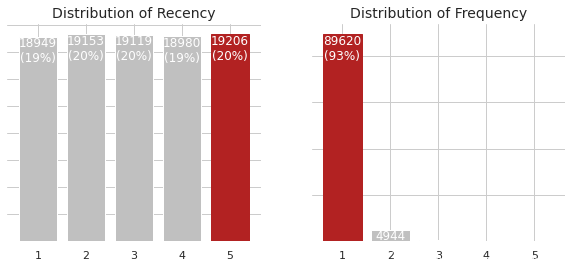

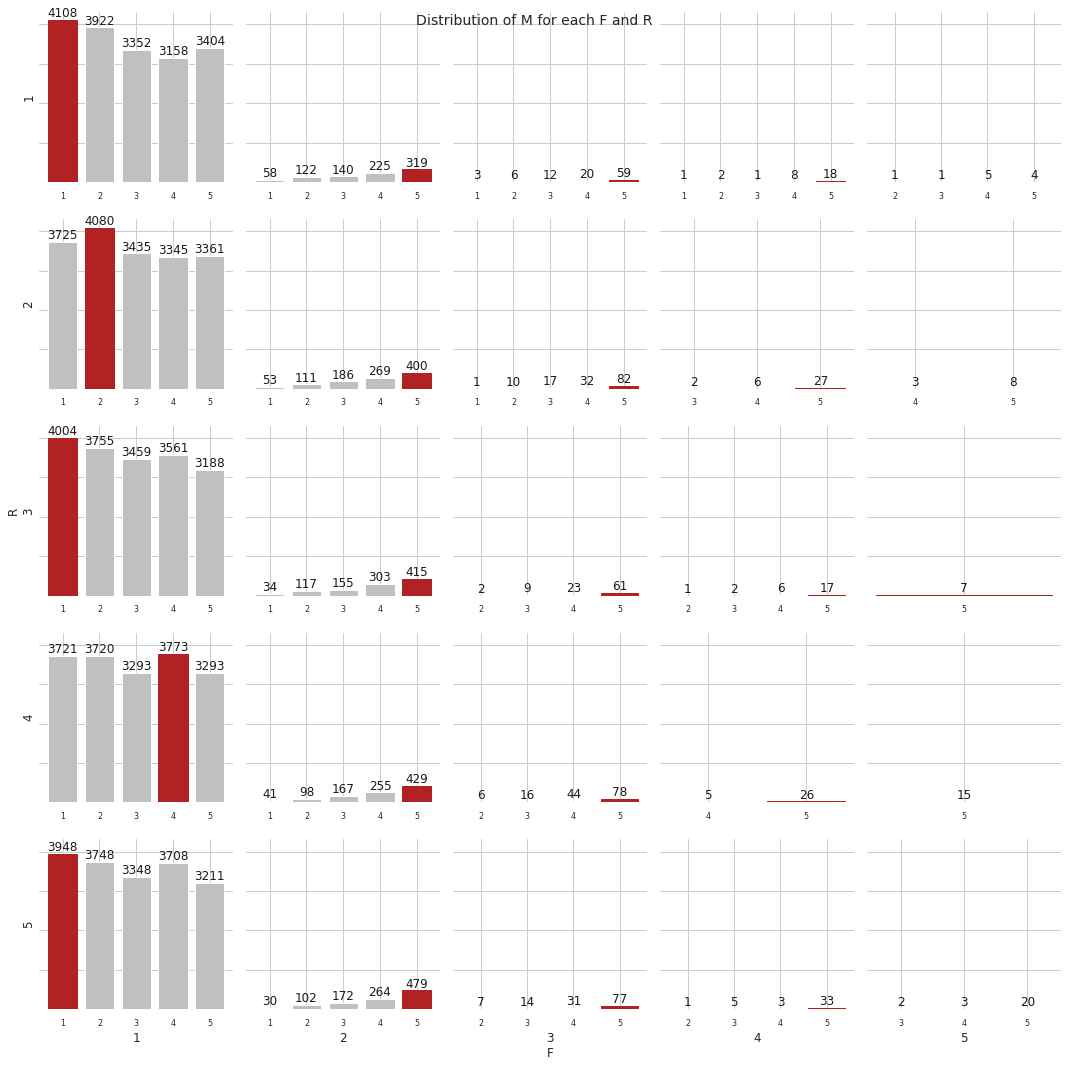

In [200]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value + 3,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(15, 15))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value ,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Видно, что подавляющее число покупателей суммарно делает 1-2 покупки (Frequency). Bремя от последней покупки пользователя до текущей даты (Recency) у пользователей распределено равномерно.

Чем больше суммарное количество покупок (Frequency), тем выше сумма покупок за исследуемое время (Monetary) - столбики на 2-м графике.

Let's look at the distribution of our segments.
I am not going to use a treemap like the segments matrix shown above to visualize the distribution of segments. Bar charts are a better fit for comparing quantities.

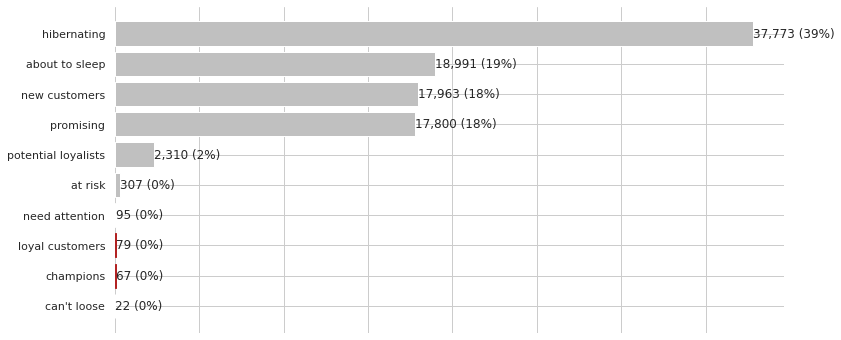

In [201]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Больше всего покупателей в категории Hibernating - последняя покупка была давно и суммарное количество покупок маленькое. Также много покупателей в категориях About To Sleep, New Customers, Promising. Эти 3 категории соответствуют низкому суммарному количеству покупок. Максимально лояльные категории клиентов, такие как Champions, Can't lose и Loyal customers составляют в совокупности < 1%, этот показателель бизнесу необходимо растить.

Further analysis can be done that integrate the Monetary parameters.
With customers assigned to segments and some statistics on the composition of our customers portfolio, we can work on targeted marketing campaigns to retain customers that are at risk, improve sales to customers with some potential and reward the best customers.